Dataset shape: (5172, 3002)

First few rows:
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

Column names (fi

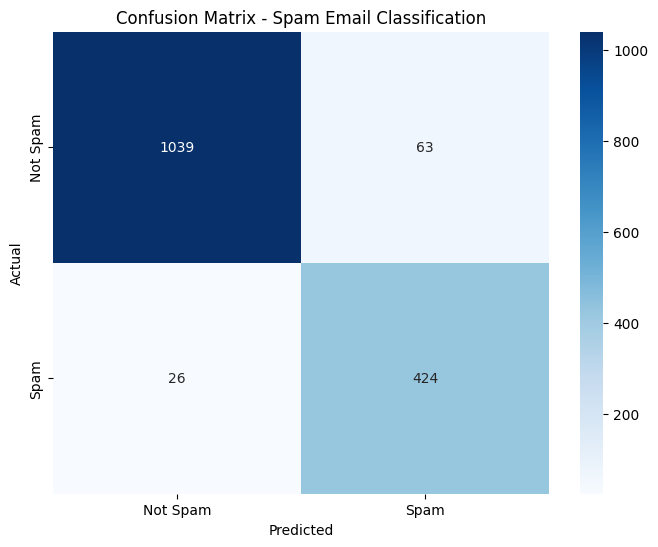


Top 10 Spam Indicators:
nbsp: 6.6394
pills: 6.1631
font: 5.7406
viagra: 5.6302
href: 5.5408
computron: 5.4661
arial: 5.4426
prescription: 5.4346
border: 5.3685
drug: 5.3425

Top 10 Non-Spam Indicators:
enron: -7.9336
daren: -6.6111
hpl: -6.4469
mmbtu: -6.2833
sitara: -5.8299
nomination: -5.7463
volumes: -5.7411
forwarded: -5.5560
melissa: -5.2573
tenaska: -5.2018

Example Predictions:
Email 1482: Actual=0, Predicted=0, Correct=True
Email 1002: Actual=0, Predicted=0, Correct=True
Email 302: Actual=1, Predicted=0, Correct=False
Email 2181: Actual=1, Predicted=1, Correct=True
Email 685: Actual=1, Predicted=1, Correct=True


In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('emails.csv')

# Display basic info about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nColumn names (first 10 and last 10):")
print("First 10:", df.columns[:10].tolist())
print("Last 10:", df.columns[-10:].tolist())

# Check the target variable (last column)
print(f"\nTarget variable distribution:")
print(df.iloc[:, -1].value_counts())
print(f"Target variable name: {df.columns[-1]}")

# Prepare the data
# All columns except the first (Email No.) and last (target) are features
X = df.iloc[:, 1:-1]  # Features (word frequencies)
y = df.iloc[:, -1]    # Target (spam/not spam)

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Train Naive Bayes classifier
print("\nTraining Naive Bayes classifier...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Not Spam', 'Spam'], 
           yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - Spam Email Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance analysis
feature_names = X.columns
feature_importance = nb_classifier.feature_log_prob_[1] - nb_classifier.feature_log_prob_[0]  # Spam vs Ham difference

# Get top spam indicators
top_spam_indices = np.argsort(feature_importance)[-10:][::-1]
top_spam_words = [feature_names[i] for i in top_spam_indices]
top_spam_scores = [feature_importance[i] for i in top_spam_indices]

print("\nTop 10 Spam Indicators:")
for word, score in zip(top_spam_words, top_spam_scores):
    print(f"{word}: {score:.4f}")

# Get top non-spam indicators
top_ham_indices = np.argsort(feature_importance)[:10]
top_ham_words = [feature_names[i] for i in top_ham_indices]
top_ham_scores = [feature_importance[i] for i in top_ham_indices]

print("\nTop 10 Non-Spam Indicators:")
for word, score in zip(top_ham_words, top_ham_scores):
    print(f"{word}: {score:.4f}")

# Test with some example predictions
print("\nExample Predictions:")
sample_indices = np.random.choice(len(X_test), min(5, len(X_test)), replace=False)
for i in sample_indices:
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    email_id = X_test.index[i]
    print(f"Email {email_id}: Actual={actual}, Predicted={predicted}, Correct={actual == predicted}")